<a href="https://colab.research.google.com/github/FaustoFLES/Programacion-Analitica/blob/main/Pr%C3%A1ctica_19_Ejercicios_con_EDA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"
column_names = ['age', 'year', 'nodes', 'status']
data = pd.read_csv(url, header=None, names=column_names)
df = pd.DataFrame(data)
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
display(data.head())
data.info()
display(data.describe())

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


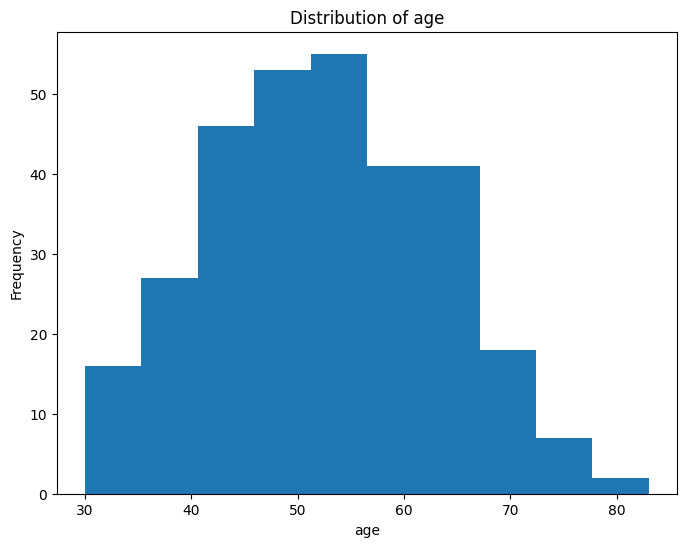

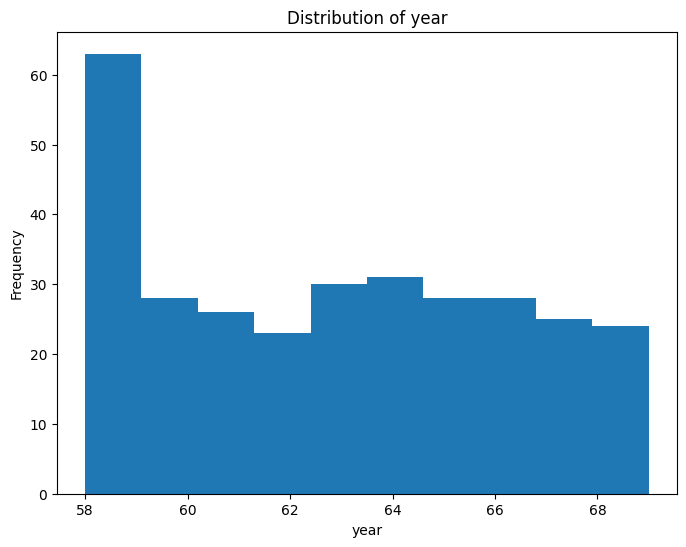

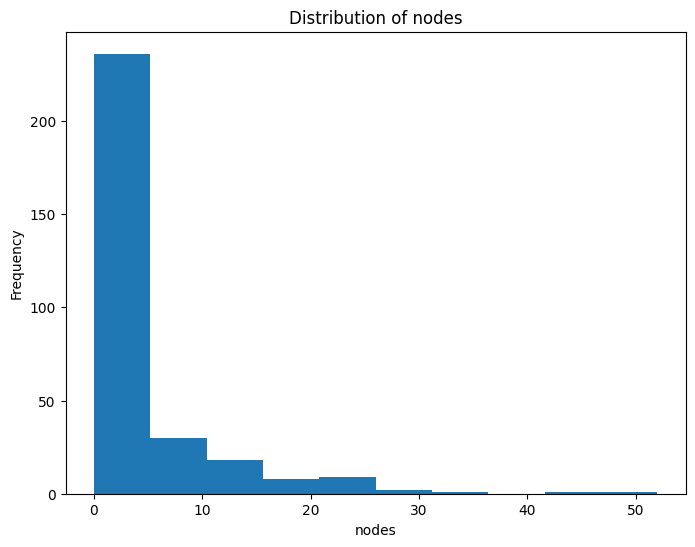

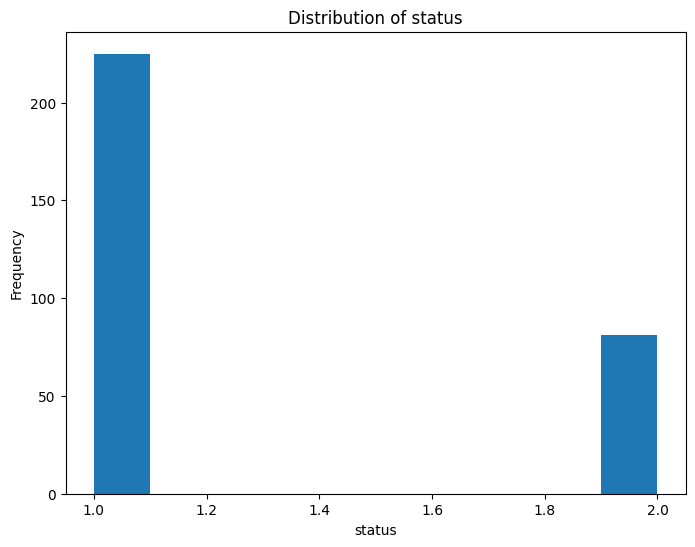

In [4]:
import matplotlib.pyplot as plt

numerical_cols = data.select_dtypes(include=['int64']).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    plt.hist(data[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

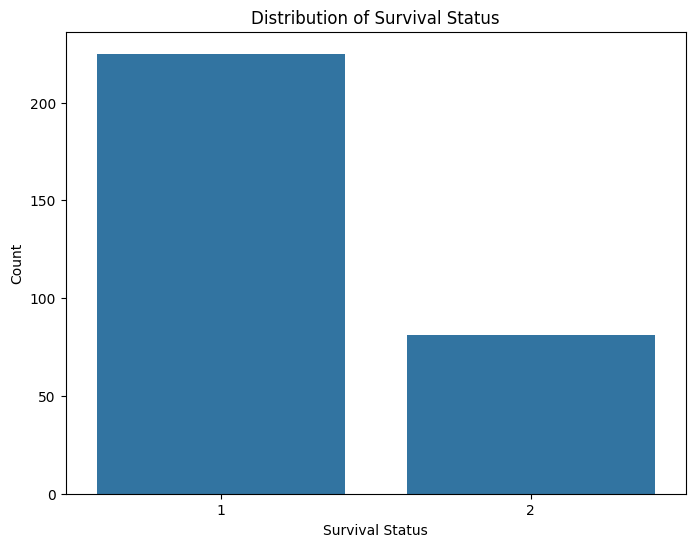

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='status', data=data)
plt.title('Distribution of Survival Status')
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.show()

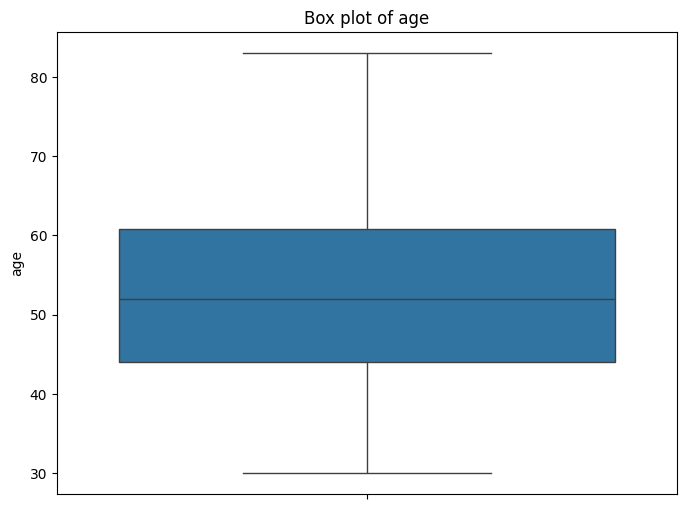

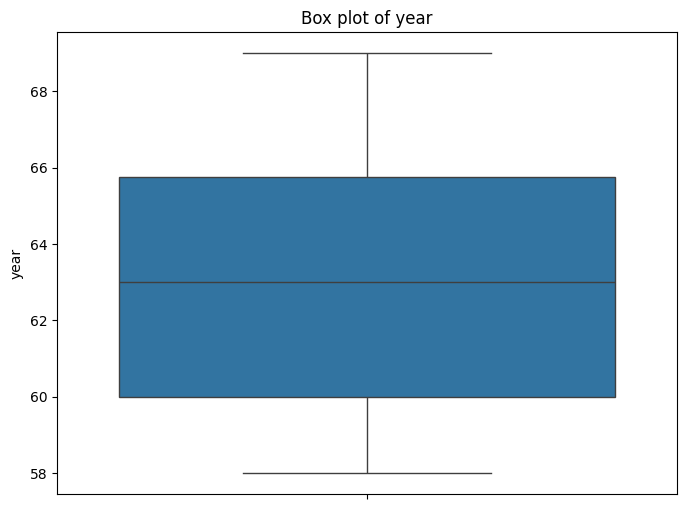

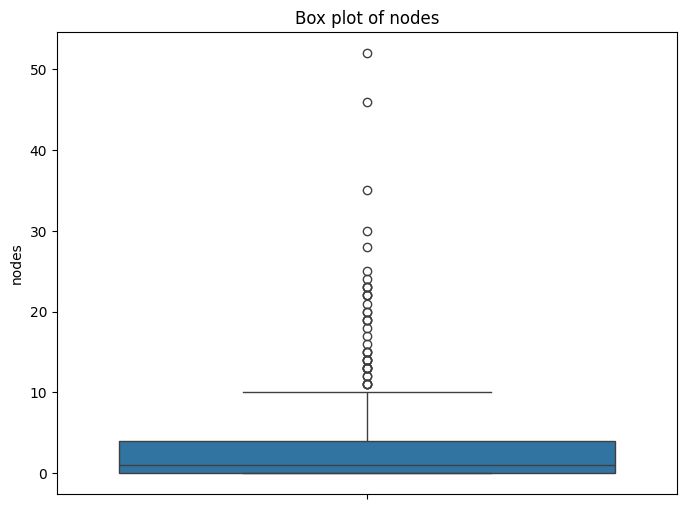

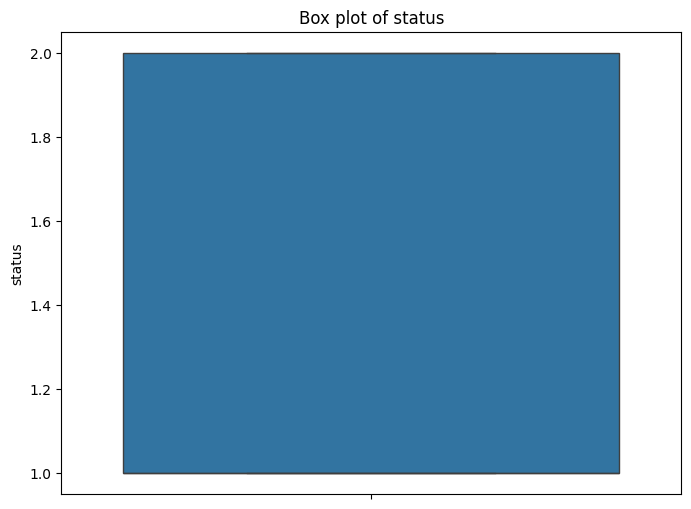

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = data.select_dtypes(include=['int64']).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=col, data=data)
    plt.title(f'Box plot of {col}')
    plt.ylabel(col)
    plt.show()

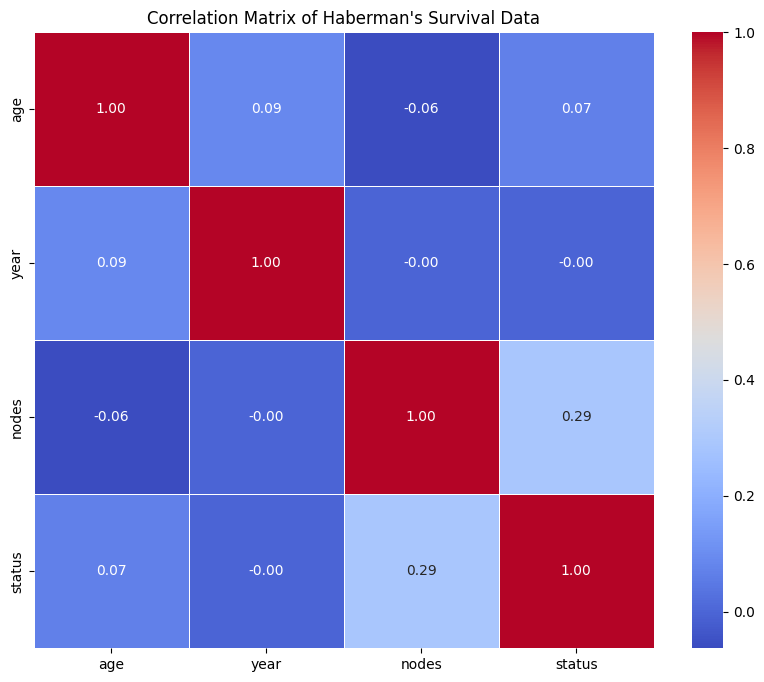

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix of Haberman's Survival Data")
plt.show()

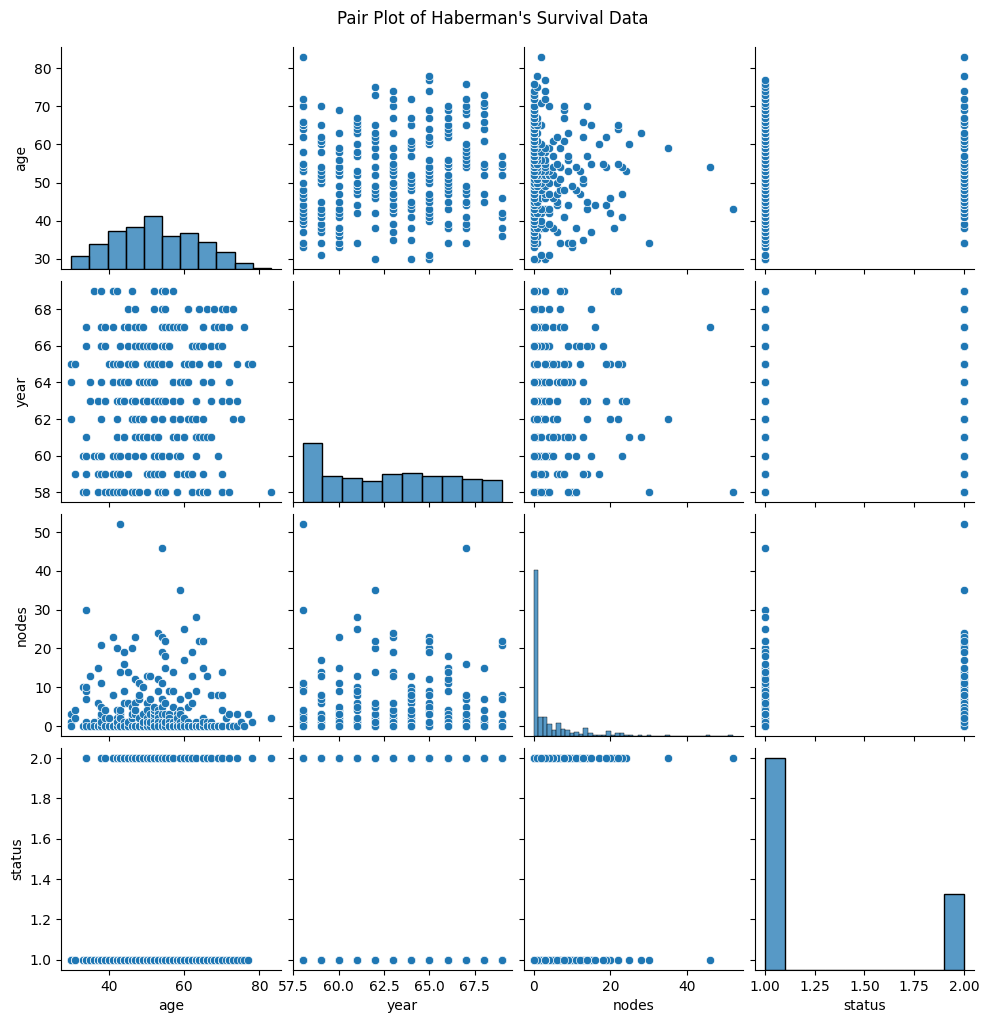

In [8]:
sns.pairplot(data)
plt.suptitle("Pair Plot of Haberman's Survival Data", y=1.02)
plt.show()


--- age ---
Shapiro-Wilk Test: Statistic=0.9895, p-value=0.0260
Anderson-Darling Test: Statistic=0.7316
  Critical Value at 15.0%: 0.5690
  Critical Value at 10.0%: 0.6480
  Critical Value at 5.0%: 0.7770
  Critical Value at 2.5%: 0.9060
  Critical Value at 1.0%: 1.0780
Kolmogorov-Smirnov Test: Statistic=1.0000, p-value=0.0000


<Figure size 600x600 with 0 Axes>

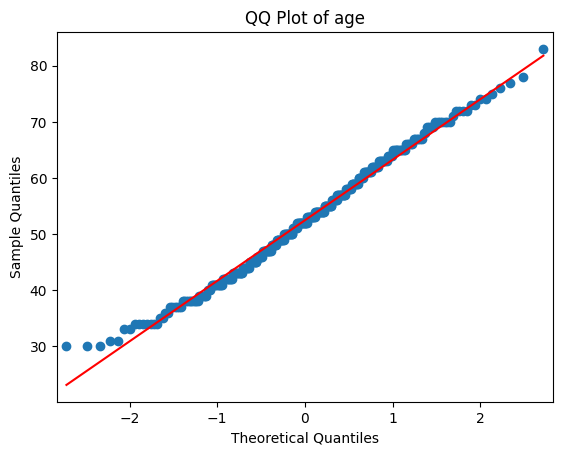


--- year ---
Shapiro-Wilk Test: Statistic=0.9468, p-value=0.0000
Anderson-Darling Test: Statistic=4.3137
  Critical Value at 15.0%: 0.5690
  Critical Value at 10.0%: 0.6480
  Critical Value at 5.0%: 0.7770
  Critical Value at 2.5%: 0.9060
  Critical Value at 1.0%: 1.0780
Kolmogorov-Smirnov Test: Statistic=1.0000, p-value=0.0000


<Figure size 600x600 with 0 Axes>

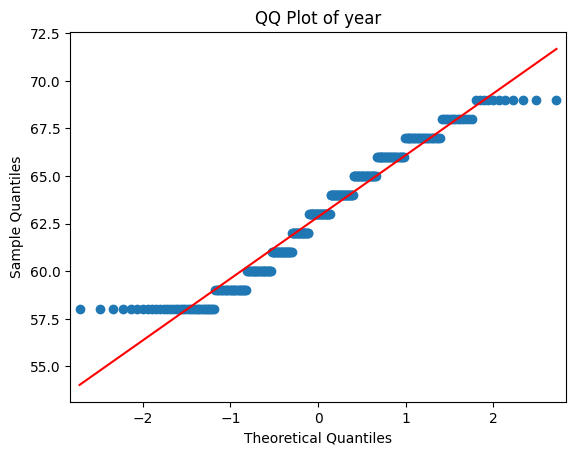


--- nodes ---
Shapiro-Wilk Test: Statistic=0.6153, p-value=0.0000
Anderson-Darling Test: Statistic=39.6866
  Critical Value at 15.0%: 0.5690
  Critical Value at 10.0%: 0.6480
  Critical Value at 5.0%: 0.7770
  Critical Value at 2.5%: 0.9060
  Critical Value at 1.0%: 1.0780
Kolmogorov-Smirnov Test: Statistic=0.5000, p-value=0.0000


<Figure size 600x600 with 0 Axes>

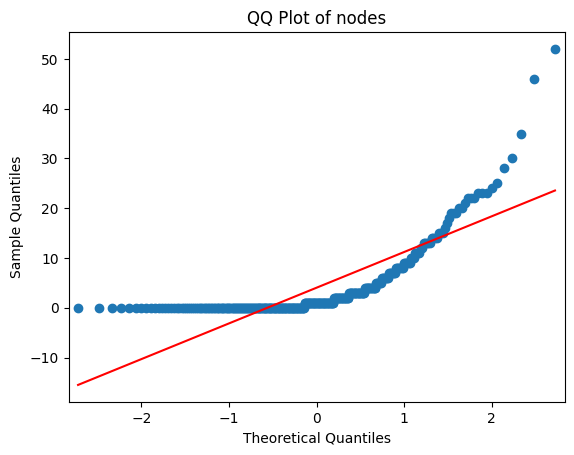


--- status ---
Shapiro-Wilk Test: Statistic=0.5504, p-value=0.0000
Anderson-Darling Test: Statistic=71.1823
  Critical Value at 15.0%: 0.5690
  Critical Value at 10.0%: 0.6480
  Critical Value at 5.0%: 0.7770
  Critical Value at 2.5%: 0.9060
  Critical Value at 1.0%: 1.0780
Kolmogorov-Smirnov Test: Statistic=0.8413, p-value=0.0000


<Figure size 600x600 with 0 Axes>

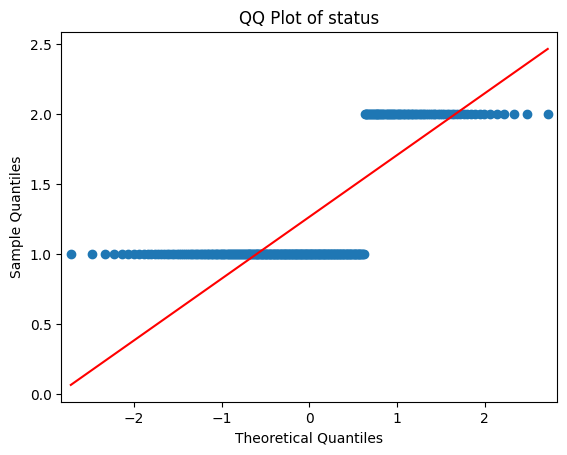

In [9]:
from scipy.stats import shapiro, anderson, kstest
from statsmodels.api import qqplot
import matplotlib.pyplot as plt

numerical_cols = data.select_dtypes(include=['int64']).columns

for col in numerical_cols:
    print(f"\n--- {col} ---")

    # Shapiro-Wilk test
    shapiro_test = shapiro(data[col])
    print(f"Shapiro-Wilk Test: Statistic={shapiro_test.statistic:.4f}, p-value={shapiro_test.pvalue:.4f}")

    # Anderson-Darling test
    anderson_test = anderson(data[col])
    print(f"Anderson-Darling Test: Statistic={anderson_test.statistic:.4f}")
    for i in range(len(anderson_test.critical_values)):
        print(f"  Critical Value at {anderson_test.significance_level[i]}%: {anderson_test.critical_values[i]:.4f}")

    # Kolmogorov-Smirnov test
    kstest_test = kstest(data[col], 'norm')
    print(f"Kolmogorov-Smirnov Test: Statistic={kstest_test.statistic:.4f}, p-value={kstest_test.pvalue:.4f}")

    # QQ plot
    plt.figure(figsize=(6, 6))
    qqplot(data[col], line='s')
    plt.title(f'QQ Plot of {col}')
    plt.show()

In [10]:
# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())

Missing values per column:
age       0
year      0
nodes     0
status    0
dtype: int64


In [12]:
# Check for missing values and display the count per column
print("Checking for missing values in the dataset:")
print(data.isnull().sum())
print("\nBased on this output, there are no missing values in this dataset.")

Checking for missing values in the dataset:
age       0
year      0
nodes     0
status    0
dtype: int64

Based on this output, there are no missing values in this dataset.


In [14]:
display(data.head())
data.info()
display(data.describe())

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [19]:
# Remap 'status' column to 0 and 1 for statsmodels
data['status_remapped'] = data['status'].replace({1: 0, 2: 1})
y_remapped = data['status_remapped']

# Add a constant to the independent variables for statistical analysis
X_with_constant = sm.add_constant(X)

# Fit logistic regression model using statsmodels with the remapped target variable
statsmodel_logit = sm.Logit(y_remapped, X_with_constant)
statsmodel_result = statsmodel_logit.fit()

# Print the summary of the statsmodels logistic regression model
print("\nStatsmodels Logistic Regression Summary:")
print(statsmodel_result.summary())

Optimization terminated successfully.
         Current function value: 0.536367
         Iterations 5

Statsmodels Logistic Regression Summary:
                           Logit Regression Results                           
Dep. Variable:        status_remapped   No. Observations:                  306
Model:                          Logit   Df Residuals:                      302
Method:                           MLE   Df Model:                            3
Date:                Fri, 03 Oct 2025   Pseudo R-squ.:                 0.07190
Time:                        03:19:42   Log-Likelihood:                -164.13
converged:                       True   LL-Null:                       -176.84
Covariance Type:            nonrobust   LLR p-value:                 1.254e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8616      2.675     -0.696      0.487      -7.105